In [1]:
#This notebook combines all the dark images into one master-dark-per-sec image, reducing uncertainty. Statsics for this image is also gathered.
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from astropy.io import fits
from astropy.utils.data import download_file

import os
import glob
import time
from matplotlib.colors import LogNorm
from IPython import display
from IPython.display import clear_output
import random

plt.rcParams.update({'font.size':15})

In [2]:
#Filepaths are defined for master-bias, master-dark-per-sec, and flat images:
image_list = []
n = 0

filepath = ''

biasfilepath = "master_bias.fits"

for file in glob.glob(filepath+"Dark_*.fits*"):
    image_list.append(file)
    n=n+1
print("\n".join(image_list))

Dark_45_secs_001.fits
Dark_45_secs_002.fits
Dark_45_secs_003.fits
Dark_45_secs_004.fits
Dark_45_secs_005.fits
Dark_45_secs_006.fits
Dark_45_secs_007.fits
Dark_45_secs_008.fits
Dark_45_secs_009.fits
Dark_45_secs_010.fits
Dark_45_secs_011.fits
Dark_45_secs_012.fits
Dark_45_secs_013.fits
Dark_45_secs_014.fits
Dark_45_secs_015.fits
Dark_45_secs_016.fits
Dark_45_secs_017.fits
Dark_45_secs_018.fits
Dark_45_secs_019.fits
Dark_45_secs_020.fits
Dark_45_secs_021.fits
Dark_45_secs_022.fits
Dark_45_secs_023.fits
Dark_45_secs_024.fits
Dark_45_secs_025.fits


In [3]:
image_concat = []

image_concat = [fits.getdata(image) for image in image_list]

hdu_number = 0 # HDU means header data unit
image_hdr = [fits.getheader(image, hdu_number) for image in image_list]

In [4]:
#An array is made for the flat images to analyse the statistics:
N_images = np.shape(image_concat)
print(N_images) #shape of array, imagex X y-pixels X x-pixels
print(N_images[0]) #number of images

image_concat[0]

(25, 3520, 4656)
25


array([[ 80, 160, 160, ..., 176, 192, 112],
       [ 80, 160,  64, ..., 160,  80,  64],
       [192, 160, 112, ..., 128, 192, 144],
       ...,
       [144, 144, 144, ..., 128, 224, 112],
       [128, 112,  96, ..., 128, 144, 224],
       [112, 176, 128, ..., 160, 144, 224]], dtype=uint16)

In [5]:
#ZWO camera is 12 bit, but it scales the output to 16 bit so we must divide the statistics by 16 to remove this:
for i in range(N_images[0]):
    image_concat[i] = image_concat[i] /16
   

In [6]:
#Subtracting the master-bias from the flat images:
masterbias_image = fits.getdata(biasfilepath)

Min: 4.0
Max: 28.92
Mean: 7.257558878084966
Median 7.24
Stdev: 0.3713808000529168


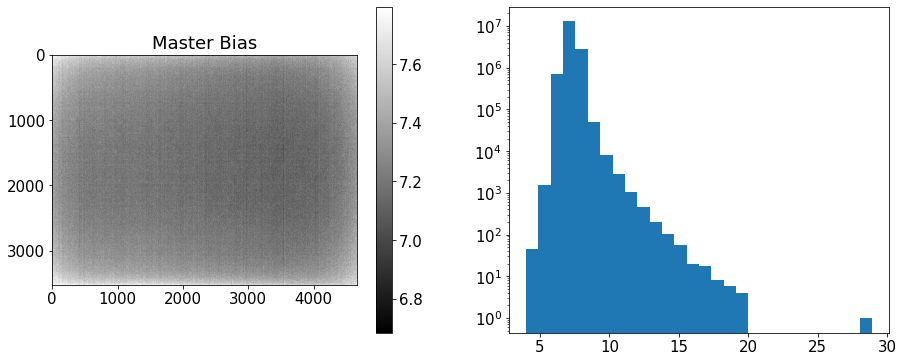

In [7]:
#Loading up the master bias image previously made in the bias section
plt.figure(figsize=(15,6))

N_std = 1.5

print('Min:', np.min(masterbias_image) )
print('Max:', np.max(masterbias_image)  )    
print('Mean:', np.mean(masterbias_image)  )
print('Median', np.median(masterbias_image)  )
print('Stdev:', np.std(masterbias_image)  )

plt.subplot(1,2,1)
plt.imshow(masterbias_image, cmap='gray', 
               vmin= np.median(masterbias_image) - N_std*np.std(masterbias_image), vmax=np.median(masterbias_image) + N_std*np.std(masterbias_image)) 
plt.title("Master Bias")
plt.colorbar()


plt.subplot(1,2,2)
plt.hist(masterbias_image.flatten(),bins=int(np.max(masterbias_image)))
plt.yscale('log')
  
plt.show()

In [8]:
#Subtracting the master bias from the dark images
for i in range(N_images[0]):
    image_concat[i] = image_concat[i] - masterbias_image

In [9]:
image_hdr[0]

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4656 / length of data axis 1                          
NAXIS2  =                 3520 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
ROWORDER= 'TOP-DOWN'           / Row Order                                      
INSTRUME= 'ZWO CCD ASI1600MM Pro' / CCD Name                                    
TELESCOP= 'SynScan '        

In [10]:
#Printing the camera temperature
for n in range(N_images[0]):
    camera_temp = image_hdr[n]["CCD-TEMP"]
    print('Camera temp = ',str(camera_temp), ' C')

Camera temp =  -17.5  C
Camera temp =  -20.5  C
Camera temp =  -20.5  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -19.5  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C


In [11]:
#Prints exposure times for each dark image
for n in range(N_images[0]):
    exposure = image_hdr[n]["EXPTIME "]
    print('Dark Exposure time= ',str(exposure))

Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0
Dark Exposure time=  45.0


In [12]:
#New arrays made to store the new data for master-dark:
image_min = np.zeros(N_images[0])
image_max = np.zeros(N_images[0])
image_mean = np.zeros(N_images[0])
image_median = np.zeros(N_images[0])
image_stdev = np.zeros(N_images[0])

Dark_45_secs_025.fits
Min: -19.0
Max: 2565.72
Mean: 1.5532230919048715
Median 1.5199999999999996
Stdev: 2.209046421141342


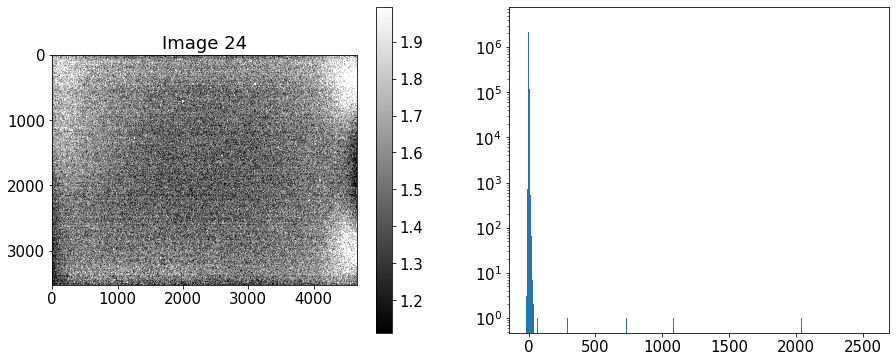

In [13]:
#Will check each image for unexpected stats/images
#Going through each dark image to find some statistics and a histogram
N_std = 0.2


for i in range(N_images[0]):
    clear_output(wait=True)

    plt.figure(figsize=(15,6))
    
    print(image_list[i])
    image_min[i] = np.min(image_concat[i])
    image_max[i] = np.max(image_concat[i])
    image_mean[i] = np.mean(image_concat[i])
    image_median[i] = np.median(image_concat[i])
    image_stdev[i] = np.std(image_concat[i])

    
    
    print('Min:', image_min[i] )
    print('Max:', image_max[i] )    
    print('Mean:', image_mean[i] )
    print('Median', image_median[i] )
    print('Stdev:', image_stdev[i] )


    
    plt.subplot(1,2,1)
    plt.imshow(image_concat[i], cmap='gray', 
               vmin= image_mean[i] - N_std*image_stdev[i], vmax=image_mean[i] + N_std*image_stdev[i]) 
    plt.title("Image "+ str(i))
    plt.colorbar()


    plt.subplot(1,2,2)
    plt.hist(image_concat[i].flatten(),bins=int(image_max[i]))
    plt.yscale('log')
  
    plt.show()
    
    time.sleep(1) #pause in secs


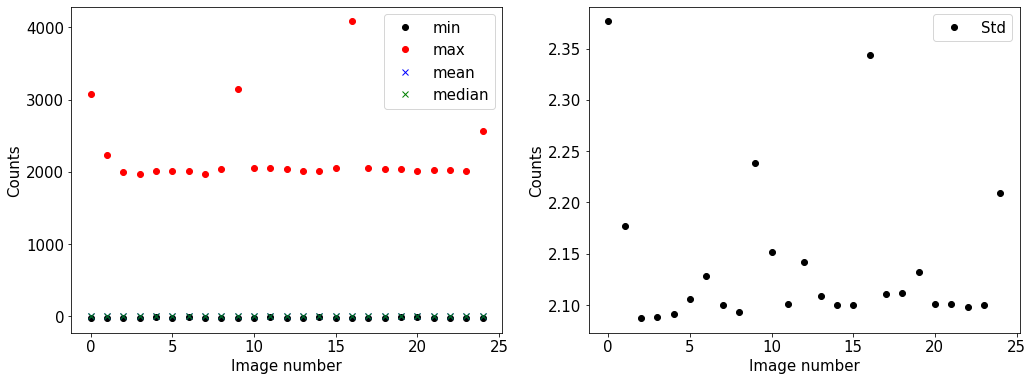

In [14]:
#Showing some of the stats on plots:
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
plt.plot(image_min,'ko',label='min')
plt.plot(image_max,'ro',label='max')
plt.plot(image_mean, 'bx', label='mean')
plt.plot(image_median,'gx',label='median')

plt.xlabel('Image number')
plt.ylabel('Counts')

plt.legend()


plt.subplot(1,2,2)
plt.plot(image_stdev,'ko',label='Std')

plt.xlabel('Image number')
plt.ylabel('Counts')

plt.legend()



plt.show()



In [15]:
#Normalising the dark images to the median:
all_data = np.zeros(N_images)
for i in range(N_images[0]):
    all_data[i,:,:] = image_concat[i]

In [16]:
NyPix = np.shape(all_data)[1]
NxPix = np.shape(all_data)[2]
print(NxPix,NyPix)

4656 3520


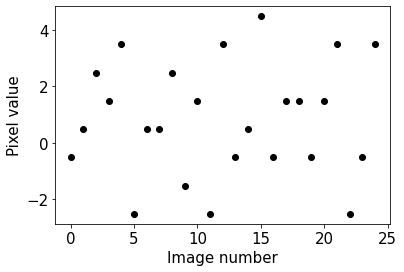

In [17]:
#Showing the varience due to noise in the dark images:
x = int(random.randint(1, NxPix))
y = int(random.randint(1, NyPix))

plt.plot(all_data[:,y,x],'ko' )

plt.xlabel('Image number')
plt.ylabel('Pixel value')

plt.show()

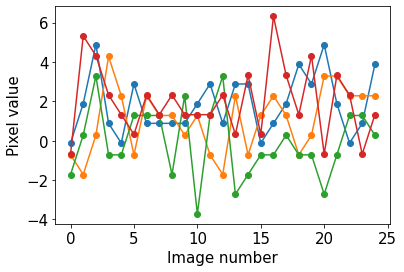

In [18]:
x_list = np.zeros(4)
y_list =  np.zeros(4)
x_list = [random.randint(1, NxPix),random.randint(1, NxPix),random.randint(1, NxPix),random.randint(1, NxPix)]
y_list = [random.randint(1, NyPix),random.randint(1, NyPix),random.randint(1, NyPix),random.randint(1, NyPix)]

for i in range(4):
    plt.plot(all_data[:,y_list[i],x_list[i]],'-o')



plt.xlabel('Image number')
plt.ylabel('Pixel value')

plt.show()

In [19]:
#Working with the standard deviation
pixels_std = np.std(all_data, axis=0)

In [20]:
np.shape(pixels_std)

(3520, 4656)

So we now have a new array where each entry if the std of the bias over the N bias images pixel by pixel. Let's have a quick look at it as a histogram.

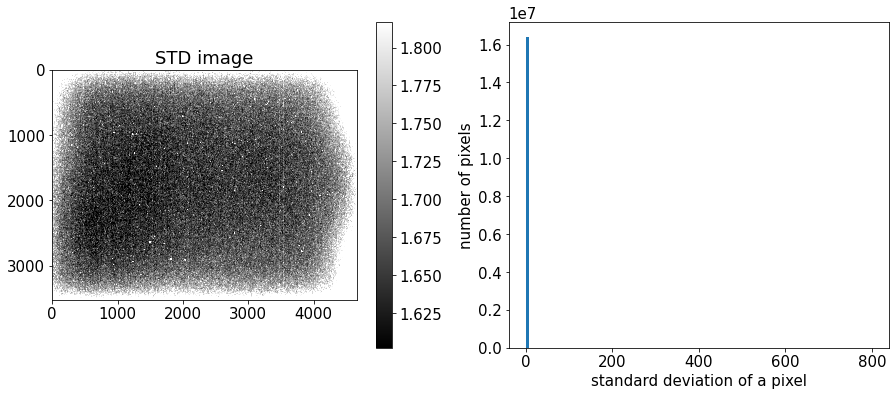

In [21]:
plt.figure(figsize=(15,6))

std_mean = np.mean(pixels_std)
std_std = np.std(pixels_std)

plt.subplot(1,2,1)
plt.imshow(pixels_std, cmap='gray',
           vmin= std_mean - N_std*std_std, vmax=std_mean + N_std*std_std)
plt.title("STD image")
plt.colorbar()

plt.subplot(1,2,2)
plt.hist(pixels_std.flatten(),bins=100)
plt.xlabel('standard deviation of a pixel')
plt.ylabel('number of pixels')


plt.show()


In [22]:
#Computing overall uncertainty in the raw dark value and the median:
Uncertainty_dark = np.median(pixels_std)
print(Uncertainty_dark)
#The read noise should be 1.7 counts according to the ZWO camera manual
#For short time exposures the dark current can be zero and the noise is equal to the read noise

1.6618062462272791


In [23]:
print('Dark uncertainty: {0:.2f} counts'.format(Uncertainty_dark))


Dark uncertainty: 1.66 counts


In [24]:
#Combing the flat images to produce master-flat to reduce the uncertainty by root N where N is the number of images:
master_dark = np.median(all_data, axis=0)

Min: -18.92
Max: 2029.12
Mean: 1.5128354444900012
Median 1.5199999999999996
Stdev: 1.210593042747848
Total sum: 24794041.639999967


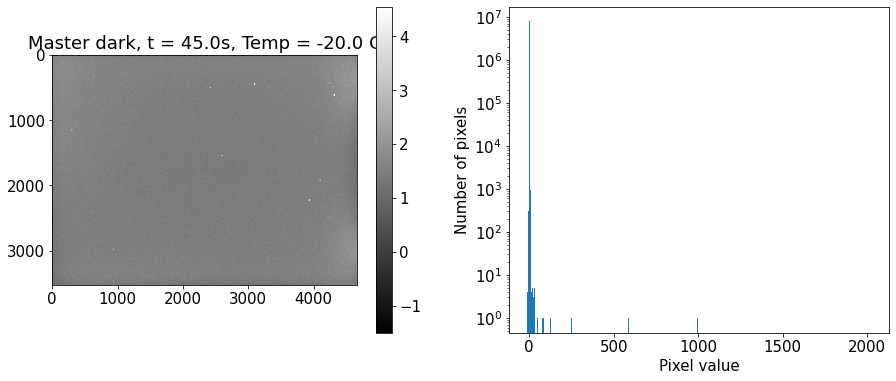

In [25]:
plt.figure(figsize=(15,6))
            
    
N_std = 2.5
    
print('Min:', np.min(master_dark) )
print('Max:', np.max(master_dark)  )    
print('Mean:', np.mean(master_dark)  )
print('Median', np.median(master_dark)  )
print('Stdev:', np.std(master_dark)  )
print('Total sum:',np.sum(master_dark))


    
plt.subplot(1,2,1)
plt.imshow(master_dark, cmap='gray', 
               vmin= np.median(master_dark) - N_std*np.std(master_dark), vmax=np.median(master_dark) + N_std*np.std(master_dark)) 
plt.title('Master dark, t = '+str(exposure)+'s, Temp = '+str(camera_temp)+' C' )
plt.colorbar()


plt.subplot(1,2,2)
plt.hist(master_dark.flatten(),bins= int(np.max(master_dark)))
plt.yscale('log')
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
  
plt.show()
    


In [26]:
outfile = filepath+'master_dark.fits'

hdu = fits.PrimaryHDU(master_dark)
hdu.writeto(outfile, overwrite=True)

In [27]:
#Save image and stats to a file:
stats_data = np.zeros([N_images[0]+2,5])
stats_data[0:N_images[0],0] = image_min
stats_data[0:N_images[0],1] = image_max
stats_data[0:N_images[0],2] = image_mean
stats_data[0:N_images[0],3] = image_median
stats_data[0:N_images[0],4] = image_stdev


# Add master stats at the end
stats_data[-1,0] = np.min(master_dark)
stats_data[-1,1] = np.max(master_dark)
stats_data[-1,2] = np.mean(master_dark)
stats_data[-1,3] = np.median(master_dark)
stats_data[-1,4] = np.std(master_dark)

# Add  stats image at the end
stats_data[-2,0] = np.min(pixels_std)
stats_data[-2,1] = np.max(pixels_std)
stats_data[-2,2] = np.mean(pixels_std)
stats_data[-2,3] = np.median(pixels_std)
stats_data[-2,4] = np.std(pixels_std)

df_stats = pd.DataFrame(data=stats_data,columns=['min','max','mean','median','std'])

In [28]:
image_list.append(filepath+'std_image')
image_list.append(filepath+'master_dark.fits')

df_stats['filename'] = image_list

In [29]:
camera_temp = []
exposure = []
camera_filter = []

FILTER  = 'Luminance'

for n in range(N_images[0]):
    camera_temp.append(image_hdr[n]["CCD-TEMP"])
    exposure.append(image_hdr[n]["EXPTIME "])
    camera_filter.append(image_hdr[n]["FILTER "])

# need to do something for the std and master images etc.

mean_temp = np.mean(camera_temp)
mean_exposure = np.mean(exposure)


camera_temp.append(mean_temp)
camera_temp.append(mean_temp)
exposure.append(mean_exposure)
exposure.append(mean_exposure)
camera_filter.append(image_hdr[n]["FILTER "])
camera_filter.append(image_hdr[n]["FILTER "])

df_stats['Temp'] = camera_temp
df_stats['Exposure/s'] = exposure
df_stats['Filter '] = camera_filter

In [30]:
what_list = []
for i in range(N_images[0]):
    what_list.append('dark')
    
what_list.append('Std_image')
what_list.append('master')



# Make column of "what"
df_stats['what'] = what_list

In [31]:
df_stats.to_csv(filepath+'dark_stats.csv') #write to file.

In [32]:
#Producing a master-dark-per-sec so it can be scaled to any value below whatever the original exposure was:
exposures = np.zeros(N_images[0])

for n in range(N_images[0]):
    exposures[n] = image_hdr[n]["EXPTIME "]
print(exposures)

[45. 45. 45. 45. 45. 45. 45. 45. 45. 45. 45. 45. 45. 45. 45. 45. 45. 45.
 45. 45. 45. 45. 45. 45. 45.]


In [33]:
outfile = filepath+'master_dark_per_sec.fits'

hdu = fits.PrimaryHDU(master_dark/np.mean(exposures))
hdu.writeto(outfile, overwrite=True)